Target: AVG

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
x_train=pd.read_csv("AVG\\AVG_train_x.csv")
y_train=pd.read_csv("AVG\\AVG_train_y.csv")
x_test=pd.read_csv("AVG\\AVG_test_x.csv")
y_test=pd.read_csv("AVG\\AVG_test_y.csv")

In [3]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])

In [4]:
y_train=y_train.drop(columns=["T_ID", "YEAR"])

In [5]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [6]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3008      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 11,457
Trainable params: 11,457
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2,
  callbacks=[PrintDot()])

Train on 2336 samples, validate on 584 samples
Epoch 1/500

.2336/2336 - 1s - loss: 0.0464 - mae: 0.1528 - mse: 0.0464 - val_loss: 0.0071 - val_mae: 0.0763 - val_mse: 0.0071
Epoch 2/500
.2336/2336 - 0s - loss: 0.0239 - mae: 0.1446 - mse: 0.0239 - val_loss: 0.0105 - val_mae: 0.0961 - val_mse: 0.0105
Epoch 3/500
.2336/2336 - 0s - loss: 0.0134 - mae: 0.1034 - mse: 0.0134 - val_loss: 0.0163 - val_mae: 0.1218 - val_mse: 0.0163
Epoch 4/500
.2336/2336 - 0s - loss: 0.0089 - mae: 0.0854 - mse: 0.0089 - val_loss: 0.0045 - val_mae: 0.0599 - val_mse: 0.0045
Epoch 5/500
.2336/2336 - 0s - loss: 0.0039 - mae: 0.0482 - mse: 0.0039 - val_loss: 0.0080 - val_mae: 0.0848 - val_mse: 0.0080
Epoch 6/500
.2336/2336 - 0s - loss: 0.0022 - mae: 0.0393 - mse: 0.0022 - val_loss: 0.0048 - val_mae: 0.0658 - val_mse: 0.0048
Epoch 7/500
.2336/2336 - 0s - loss: 0.0016 - mae: 0.0328 - mse: 0.0016 - val_loss: 7.7250e-04 - val_mae: 0.0225 - val_mse: 7.7250e-04
Epoch 8/500
.2336/2336 - 0s - loss: 0.0014 - mae: 0.0308 - mse

Epoch 59/500
.2336/2336 - 0s - loss: 2.8737e-04 - mae: 0.0134 - mse: 2.8737e-04 - val_loss: 5.2628e-04 - val_mae: 0.0183 - val_mse: 5.2628e-04
Epoch 60/500
.2336/2336 - 0s - loss: 2.7890e-04 - mae: 0.0130 - mse: 2.7890e-04 - val_loss: 9.3960e-04 - val_mae: 0.0251 - val_mse: 9.3960e-04
Epoch 61/500
.2336/2336 - 0s - loss: 2.9008e-04 - mae: 0.0134 - mse: 2.9008e-04 - val_loss: 7.1857e-04 - val_mae: 0.0214 - val_mse: 7.1857e-04
Epoch 62/500
.2336/2336 - 0s - loss: 2.7271e-04 - mae: 0.0131 - mse: 2.7271e-04 - val_loss: 6.5528e-04 - val_mae: 0.0203 - val_mse: 6.5528e-04
Epoch 63/500
.2336/2336 - 0s - loss: 2.6809e-04 - mae: 0.0129 - mse: 2.6809e-04 - val_loss: 0.0012 - val_mae: 0.0296 - val_mse: 0.0012
Epoch 64/500
.2336/2336 - 0s - loss: 2.8319e-04 - mae: 0.0133 - mse: 2.8319e-04 - val_loss: 5.8000e-04 - val_mae: 0.0194 - val_mse: 5.8000e-04
Epoch 65/500
.2336/2336 - 0s - loss: 2.7477e-04 - mae: 0.0131 - mse: 2.7477e-04 - val_loss: 0.0012 - val_mae: 0.0293 - val_mse: 0.0012
Epoch 66/500
.2

.2336/2336 - 0s - loss: 2.1305e-04 - mae: 0.0114 - mse: 2.1305e-04 - val_loss: 7.4318e-04 - val_mae: 0.0221 - val_mse: 7.4318e-04
Epoch 118/500
.2336/2336 - 0s - loss: 2.0707e-04 - mae: 0.0112 - mse: 2.0707e-04 - val_loss: 5.9765e-04 - val_mae: 0.0200 - val_mse: 5.9765e-04
Epoch 119/500
.2336/2336 - 0s - loss: 2.1684e-04 - mae: 0.0114 - mse: 2.1684e-04 - val_loss: 5.3319e-04 - val_mae: 0.0186 - val_mse: 5.3319e-04
Epoch 120/500
.2336/2336 - 0s - loss: 2.0974e-04 - mae: 0.0112 - mse: 2.0974e-04 - val_loss: 9.0989e-04 - val_mae: 0.0253 - val_mse: 9.0989e-04
Epoch 121/500
.2336/2336 - 0s - loss: 2.1655e-04 - mae: 0.0115 - mse: 2.1655e-04 - val_loss: 0.0013 - val_mae: 0.0312 - val_mse: 0.0013
Epoch 122/500
.2336/2336 - 0s - loss: 2.0532e-04 - mae: 0.0113 - mse: 2.0532e-04 - val_loss: 5.2454e-04 - val_mae: 0.0184 - val_mse: 5.2454e-04
Epoch 123/500
.2336/2336 - 0s - loss: 2.1102e-04 - mae: 0.0112 - mse: 2.1102e-04 - val_loss: 5.2645e-04 - val_mae: 0.0184 - val_mse: 5.2645e-04
Epoch 124/500


.2336/2336 - 0s - loss: 1.7533e-04 - mae: 0.0103 - mse: 1.7533e-04 - val_loss: 8.1317e-04 - val_mae: 0.0234 - val_mse: 8.1317e-04
Epoch 176/500
.2336/2336 - 0s - loss: 1.6614e-04 - mae: 0.0100 - mse: 1.6614e-04 - val_loss: 0.0011 - val_mae: 0.0283 - val_mse: 0.0011
Epoch 177/500
.2336/2336 - 0s - loss: 1.7251e-04 - mae: 0.0101 - mse: 1.7251e-04 - val_loss: 7.7199e-04 - val_mae: 0.0228 - val_mse: 7.7199e-04
Epoch 178/500
.2336/2336 - 0s - loss: 1.7780e-04 - mae: 0.0103 - mse: 1.7780e-04 - val_loss: 6.0939e-04 - val_mae: 0.0199 - val_mse: 6.0939e-04
Epoch 179/500
.2336/2336 - 0s - loss: 1.7158e-04 - mae: 0.0101 - mse: 1.7158e-04 - val_loss: 7.5834e-04 - val_mae: 0.0225 - val_mse: 7.5834e-04
Epoch 180/500
.2336/2336 - 0s - loss: 1.7515e-04 - mae: 0.0102 - mse: 1.7515e-04 - val_loss: 0.0011 - val_mae: 0.0289 - val_mse: 0.0011
Epoch 181/500
.2336/2336 - 0s - loss: 1.7013e-04 - mae: 0.0100 - mse: 1.7013e-04 - val_loss: 0.0011 - val_mae: 0.0277 - val_mse: 0.0011
Epoch 182/500
.2336/2336 - 0s 

.2336/2336 - 0s - loss: 1.4904e-04 - mae: 0.0094 - mse: 1.4904e-04 - val_loss: 0.0014 - val_mae: 0.0321 - val_mse: 0.0014
Epoch 234/500
.2336/2336 - 0s - loss: 1.4620e-04 - mae: 0.0094 - mse: 1.4620e-04 - val_loss: 8.9955e-04 - val_mae: 0.0246 - val_mse: 8.9955e-04
Epoch 235/500
.2336/2336 - 0s - loss: 1.4169e-04 - mae: 0.0092 - mse: 1.4169e-04 - val_loss: 0.0015 - val_mae: 0.0332 - val_mse: 0.0015
Epoch 236/500
.2336/2336 - 0s - loss: 1.4694e-04 - mae: 0.0094 - mse: 1.4694e-04 - val_loss: 6.6838e-04 - val_mae: 0.0207 - val_mse: 6.6838e-04
Epoch 237/500
.2336/2336 - 0s - loss: 1.4399e-04 - mae: 0.0093 - mse: 1.4399e-04 - val_loss: 7.5417e-04 - val_mae: 0.0222 - val_mse: 7.5417e-04
Epoch 238/500
.2336/2336 - 0s - loss: 1.4372e-04 - mae: 0.0093 - mse: 1.4372e-04 - val_loss: 8.1278e-04 - val_mae: 0.0232 - val_mse: 8.1278e-04
Epoch 239/500
.2336/2336 - 0s - loss: 1.4663e-04 - mae: 0.0092 - mse: 1.4663e-04 - val_loss: 0.0011 - val_mae: 0.0280 - val_mse: 0.0011
Epoch 240/500
.2336/2336 - 0s 

Epoch 292/500
.2336/2336 - 0s - loss: 1.2718e-04 - mae: 0.0087 - mse: 1.2718e-04 - val_loss: 0.0011 - val_mae: 0.0277 - val_mse: 0.0011
Epoch 293/500
.2336/2336 - 0s - loss: 1.2974e-04 - mae: 0.0088 - mse: 1.2974e-04 - val_loss: 0.0010 - val_mae: 0.0269 - val_mse: 0.0010
Epoch 294/500
.2336/2336 - 0s - loss: 1.2786e-04 - mae: 0.0086 - mse: 1.2786e-04 - val_loss: 9.8220e-04 - val_mae: 0.0259 - val_mse: 9.8220e-04
Epoch 295/500
.2336/2336 - 0s - loss: 1.2797e-04 - mae: 0.0088 - mse: 1.2797e-04 - val_loss: 9.7231e-04 - val_mae: 0.0257 - val_mse: 9.7231e-04
Epoch 296/500
.2336/2336 - 0s - loss: 1.3311e-04 - mae: 0.0089 - mse: 1.3311e-04 - val_loss: 0.0010 - val_mae: 0.0265 - val_mse: 0.0010
Epoch 297/500
.2336/2336 - 0s - loss: 1.3117e-04 - mae: 0.0089 - mse: 1.3117e-04 - val_loss: 0.0012 - val_mae: 0.0291 - val_mse: 0.0012
Epoch 298/500
.2336/2336 - 0s - loss: 1.2629e-04 - mae: 0.0087 - mse: 1.2629e-04 - val_loss: 0.0010 - val_mae: 0.0268 - val_mse: 0.0010
Epoch 299/500
.2336/2336 - 0s - 

Epoch 351/500
.2336/2336 - 0s - loss: 1.2432e-04 - mae: 0.0085 - mse: 1.2432e-04 - val_loss: 6.9238e-04 - val_mae: 0.0217 - val_mse: 6.9238e-04
Epoch 352/500
.2336/2336 - 0s - loss: 1.1595e-04 - mae: 0.0083 - mse: 1.1595e-04 - val_loss: 9.0387e-04 - val_mae: 0.0246 - val_mse: 9.0387e-04
Epoch 353/500
.2336/2336 - 0s - loss: 1.0716e-04 - mae: 0.0080 - mse: 1.0716e-04 - val_loss: 7.2513e-04 - val_mae: 0.0222 - val_mse: 7.2513e-04
Epoch 354/500
.2336/2336 - 0s - loss: 1.1784e-04 - mae: 0.0083 - mse: 1.1784e-04 - val_loss: 7.7789e-04 - val_mae: 0.0224 - val_mse: 7.7789e-04
Epoch 355/500
.2336/2336 - 0s - loss: 1.1718e-04 - mae: 0.0083 - mse: 1.1718e-04 - val_loss: 9.1628e-04 - val_mae: 0.0252 - val_mse: 9.1628e-04
Epoch 356/500
.2336/2336 - 0s - loss: 1.1564e-04 - mae: 0.0082 - mse: 1.1564e-04 - val_loss: 8.0412e-04 - val_mae: 0.0233 - val_mse: 8.0412e-04
Epoch 357/500
.2336/2336 - 0s - loss: 1.0970e-04 - mae: 0.0082 - mse: 1.0970e-04 - val_loss: 0.0011 - val_mae: 0.0272 - val_mse: 0.0011


Epoch 409/500
.2336/2336 - 0s - loss: 1.0997e-04 - mae: 0.0081 - mse: 1.0997e-04 - val_loss: 8.4291e-04 - val_mae: 0.0237 - val_mse: 8.4291e-04
Epoch 410/500
.2336/2336 - 0s - loss: 1.0404e-04 - mae: 0.0079 - mse: 1.0404e-04 - val_loss: 8.9859e-04 - val_mae: 0.0247 - val_mse: 8.9858e-04
Epoch 411/500
.2336/2336 - 0s - loss: 1.0644e-04 - mae: 0.0080 - mse: 1.0644e-04 - val_loss: 0.0011 - val_mae: 0.0277 - val_mse: 0.0011
Epoch 412/500
.2336/2336 - 0s - loss: 1.0507e-04 - mae: 0.0078 - mse: 1.0507e-04 - val_loss: 8.9077e-04 - val_mae: 0.0248 - val_mse: 8.9077e-04
Epoch 413/500
.2336/2336 - 0s - loss: 9.9791e-05 - mae: 0.0078 - mse: 9.9791e-05 - val_loss: 0.0011 - val_mae: 0.0280 - val_mse: 0.0011
Epoch 414/500
.2336/2336 - 0s - loss: 1.0452e-04 - mae: 0.0079 - mse: 1.0452e-04 - val_loss: 0.0012 - val_mae: 0.0286 - val_mse: 0.0012
Epoch 415/500
.2336/2336 - 0s - loss: 1.0271e-04 - mae: 0.0077 - mse: 1.0271e-04 - val_loss: 0.0011 - val_mae: 0.0278 - val_mse: 0.0011
Epoch 416/500
.2336/2336

Epoch 468/500
.2336/2336 - 0s - loss: 1.0241e-04 - mae: 0.0077 - mse: 1.0241e-04 - val_loss: 0.0010 - val_mae: 0.0265 - val_mse: 0.0010
Epoch 469/500
.2336/2336 - 0s - loss: 1.0090e-04 - mae: 0.0078 - mse: 1.0090e-04 - val_loss: 9.4417e-04 - val_mae: 0.0255 - val_mse: 9.4417e-04
Epoch 470/500
.2336/2336 - 0s - loss: 9.8103e-05 - mae: 0.0077 - mse: 9.8102e-05 - val_loss: 0.0015 - val_mae: 0.0337 - val_mse: 0.0015
Epoch 471/500
.2336/2336 - 0s - loss: 9.5371e-05 - mae: 0.0075 - mse: 9.5371e-05 - val_loss: 0.0013 - val_mae: 0.0303 - val_mse: 0.0013
Epoch 472/500
.2336/2336 - 0s - loss: 9.9362e-05 - mae: 0.0076 - mse: 9.9362e-05 - val_loss: 7.9235e-04 - val_mae: 0.0230 - val_mse: 7.9235e-04
Epoch 473/500
.2336/2336 - 0s - loss: 9.4622e-05 - mae: 0.0075 - mse: 9.4622e-05 - val_loss: 9.0843e-04 - val_mae: 0.0250 - val_mse: 9.0843e-04
Epoch 474/500
.2336/2336 - 0s - loss: 9.4490e-05 - mae: 0.0075 - mse: 9.4490e-05 - val_loss: 9.4616e-04 - val_mae: 0.0256 - val_mse: 9.4616e-04
Epoch 475/500
.2

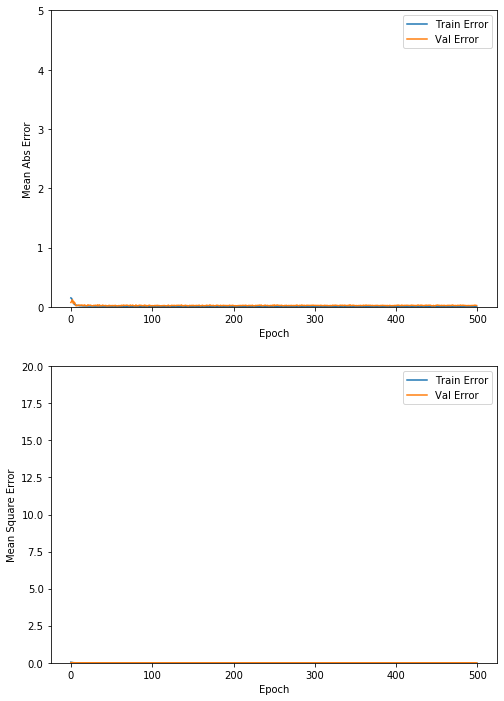

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [9]:
x_test=x_test.drop(columns=["T_ID", "YEAR"])
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [10]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} ".format(mae))

50/50 - 0s - loss: 7.9337e-04 - mae: 0.0218 - mse: 7.9337e-04
테스트 세트의 평균 절대 오차:  0.02 


In [11]:
pred=model.predict(x_test)

In [12]:
y_test["pred"]=pred

T_ID랑 team 붙여서 넣기, rms와 rms_avg값을 비교하기, 평균보다 좋은 모델을 만들어야함<br>
r2 score도 함께

In [13]:
y_test

,AVG,pred
0,0.288575,0.314050
1,0.256739,0.295474
2,0.295455,0.291733
3,0.296069,0.289481
4,0.309893,0.295367
5,0.287440,0.284831
6,0.298225,0.267061
7,0.305263,0.253360
8,0.283863,0.300903
9,0.289941,0.300797
